# Introduction

In ensemble learning the basis on one type of model or more are used in creative ways to build an entirely new one. In other words, every ensemble will:

1. Have many different (or the same) classifiers.
2. Each of which makes a classification or regression.
3. And in the end, a final prediction is made using some statistical mode on each of the models.

The main idea is to employ whats known as the "wisdom of the crowd", and that in general, any individual classifier performs worse than many models working together. For example, in a "count the number of jelly beans in a jar" analogy, the average prediction will in the majority of cases have a lower error than any the error of a single individuals prediction.

**Why do ensemble methods tend to work so well?**

Intuitively we can probabely understand why this is the case. In the jelly bean analogy, a individuals overestimately will in most cases be eliminated by a persons underestimate. By even mathematically, we can show that an ensemble of weak learners (models that tend to perform slightly better than random guessing), become a strong learner (a high accuracy achieving model).

Consider the following simulation for a binary classifier.

1. You have 10 classifiers, each of which have 51% probability of obtaining the correct classification (we'll call heads).
2. An individual classifier forms its prediction. Then we obtain our final classification by obtaining the majority voted classification on the 10 different classifiers.

![more_models_is_better.png](../../assets/6-model-ensemble-and-improvement-techniques/more_models_is_better.png)

In [19]:
from queue import Queue
from collections import Counter
import pandas as pd


def build_prob_tree(p_events, n_models):
    assert sum(p_events) == 1, "all probable events must sum to 1."
    history = []
    q = Queue()
    q.put({'n_models': 0, 'prob': 1, 'class': '', 'winner': None})
    
    while not q.empty():
        parent = q.get()
        history.append(parent)
        if parent['n_models'] <= n_models:
            for c, p in enumerate(p_events):
                _class = parent['class']+str(c)
                majority_class = Counter(_class).most_common(1)[0][0]
                q.put({'n_models': parent['n_models']+1,
                       'prob': p*parent['prob'],
                       'class': _class,
                       'winner': majority_class})
    return history


hist = build_prob_tree([.49, .51], 15)
pd.DataFrame(hist).head(10)

,class,n_models,prob,winner
0,,0,1.000000,None
1,0,1,0.490000,0
2,1,1,0.510000,1
3,00,2,0.240100,0
4,01,2,0.249900,0
5,10,2,0.249900,1
6,11,2,0.260100,1
7,000,3,0.117649,0
8,001,3,0.122451,0
9,010,3,0.122451,0


In [20]:
from collections import defaultdict


def flatten_by_level(history, correct_classifier):
    by_n_models = defaultdict(list)
    for d in history:
        by_n_models[d['n_models']].append(d)
    
    flattened_d = []
    for n_models, d_list in by_n_models.items():
        sum_correct_model_prob = 0
        for d in d_list:
            if d['winner'] == correct_classifier:
                sum_correct_model_prob += d['prob']
        flattened_d.append({'n_models': n_models,
                            'p_correct': sum_correct_model_prob})
    return flattened_d


flattened_hist = flatten_by_level(hist, '1')
flattened_hist_df = pd.DataFrame(flattened_hist)
flattened_hist_df.head(10)

,n_models,p_correct
0,0,0.000000
1,1,0.510000
2,2,0.510000
3,3,0.514998
4,4,0.514998
5,5,0.518745
6,6,0.518745
7,7,0.521866
8,8,0.521866
9,9,0.524596


Text(0.5, 1.0, 'Probability of Correct Binary Classification from Voting\n via Variable Weak Learners | P(X=0)=.49 && P(X=1)=.51')

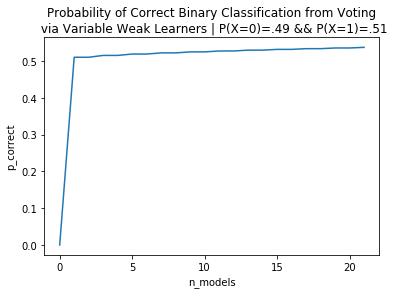

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.lineplot(x="n_models", y="p_correct", data=flattened_hist_df)
plt.title('Probability of Correct Binary Classification from Voting\n '
          'via Variable Weak Learners | P(X=0)=.49 && P(X=1)=.51')

Text(0.5, 1.0, 'Probability of Correct Binary Classification from Voting\n via Variable Weak Learners | P(X=0)=.30 && P(X=1)=.70')

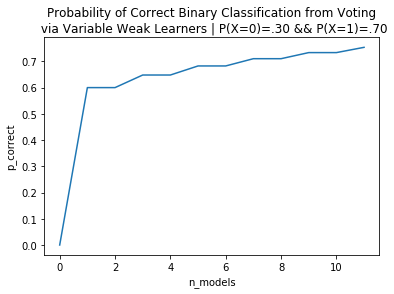

In [31]:
hist2 = build_prob_tree([.40, .60], 10)
flattened_hist2 = flatten_by_level(hist2, '1')
flattened_hist_df2 = pd.DataFrame(flattened_hist2)


ax = sns.lineplot(x="n_models", y="p_correct", data=flattened_hist_df2)
plt.title('Probability of Correct Binary Classification from Voting\n '
          'via Variable Weak Learners | P(X=0)=.40 && P(X=1)=.60')

We can see that by increasing the strength of the correct classifier, exponentially increases the performance of a voting ensemble classifier.

Text(0.5, 1.0, 'Probability of Correct Binary Classification from Voting\n via Variable Weak Learners | P(X=0)=.15 && P(X=1)=.70 && P(X=2)=.15')

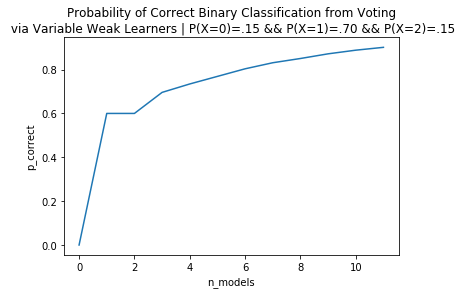

In [33]:
hist3 = build_prob_tree([.20, .60, .20], 10)
flattened_hist3 = flatten_by_level(hist3, '1')
flattened_hist_df3 = pd.DataFrame(flattened_hist3)


ax = sns.lineplot(x="n_models", y="p_correct", data=flattened_hist_df3)
plt.title('Probability of Correct Binary Classification from Voting\n '
          'via Variable Weak Learners | P(X=0)=.20 && P(X=1)=.60 && P(X=2)=.20')

As as we increase the number of classes within the model, the probability of obtaining a correct classification from the complete ensemble increase even if you main the total sum of a misclassification the same. That's wierd. ???


Of course, the details of this simulation assuming independent models, and hence do not share any uncorrelated errors. In the real world, model ensembles pull from the same data set so this same assumption cannot be justified. However this also speaks to the idea that if our models do share some correlation, the accuracy of the ensemble would decrease. This is because it would also imply models would share the same type of mistakes. 


But also the same non-mistakes ???


The main take away is that proper enemble techniques can improve the overall performance of your machine learning model. Mathematically, we've shown this to be true simply due as a probabilistic consequence. 